In this anomaly dataset we will use the isolation forest and from two different datasets to see if ther are significant differences between each of the datasets in terms of the number of anomalies.

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import featuretools as ft

In [108]:
df_twitter_apple = pd.read_csv("./data/realTweets/realTweets/Twitter_volume_AAPL.csv")
df_twitter_apple.head()

,timestamp,value
0,2015-02-26 21:42:53,104
1,2015-02-26 21:47:53,100
2,2015-02-26 21:52:53,99
3,2015-02-26 21:57:53,154
4,2015-02-26 22:02:53,120


Import all the files

In [109]:
df_twitter_amzn = pd.read_csv("./data/realTweets/realTweets/Twitter_volume_AMZN.csv")
df_twitter_amzn.tail()

,timestamp,value
15826,2015-04-22 20:32:53,51
15827,2015-04-22 20:37:53,54
15828,2015-04-22 20:42:53,46
15829,2015-04-22 20:47:53,56
15830,2015-04-22 20:52:53,50


In [110]:
df_twitter_apple['timestamp'] = pd.to_datetime(df_twitter_apple['timestamp'])
df_twitter_amzn['timestamp'] = pd.to_datetime(df_twitter_amzn['timestamp'])
# myFrames = [df_twitter_apple, df_twitter_amzn]
# df_keys = pd.concat(myFrames, keys=['apple', 'amzn'], sort=True, axis =1)
# df_keys

Lets create some quick seaborn plots to illustrate the anomalies in data

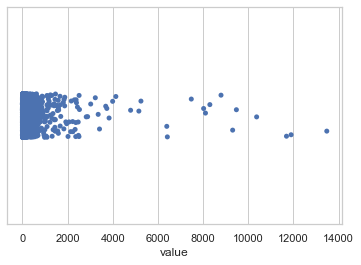

In [111]:
sns.set(style="whitegrid")
sns.stripplot( x = "value",data=df_twitter_apple)

# sns.set
# sns.lineplot(x="timestamp", y="value",data=df_twitter_amzn)

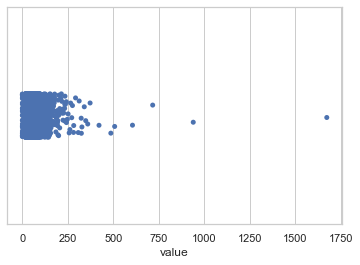

In [112]:
sns.set(style="whitegrid")
sns.stripplot( x = "value",data=df_twitter_amzn)

Lets create a split with a train and test split so as to create our two sets of data

In [113]:
from sklearn.model_selection import train_test_split
my_pred = df_twitter_apple['value']
features = df_twitter_apple[['timestamp']]
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    my_pred, 
                                                    test_size=0.20, 
                                                    random_state=42)

Create an isolation forest to illustrate what anomalies we have and seperate the the predictions and the testing sets

In [114]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples = 100)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)


c:\python37\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
c:\python37\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
c:\python37\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
c:\python37\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Print the accuracy for the anomaly for the accuracy of the prediciton of those that are not anomalies. As you can see here we have a pretty high accuracy rate

In [115]:
print("Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0])


Accuracy: 0.9038038352719271


Print the accuracy of succesfully identifying if something is an outlier

In [116]:
#Outliers

print("Accuracy:", list(y_pred_test).count(-1)/y_pred_test.shape[0])


Accuracy: 0.09619616472807294


In [117]:
my_pred = df_twitter_amzn['value']
features = df_twitter_amzn[['timestamp']]
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    my_pred, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [118]:
clf = IsolationForest(max_samples = 100)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

c:\python37\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
c:\python37\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
c:\python37\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
c:\python37\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [119]:
print("Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0])


Accuracy: 0.9008525418377012


In [120]:
print("Accuracy:", list(y_pred_test).count(-1)/y_pred_test.shape[0])


Accuracy: 0.09914745816229871


In [121]:
df_traffic_travel = pd.read_csv("./data/realTraffic/realTraffic/TravelTime_451.csv")
df_traffic_travel.head()

,timestamp,value
0,2015-07-28 11:56:00,248
1,2015-07-28 12:06:00,178
2,2015-07-28 12:25:00,155
3,2015-07-28 13:56:00,121
4,2015-07-28 14:06:00,103


In [122]:
df_traffic_travel['timestamp'] = pd.to_datetime(df_traffic_travel['timestamp'])


In [124]:
my_pred = df_traffic_travel['value']
features = df_traffic_travel[['timestamp']]
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    my_pred, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [125]:
clf = IsolationForest(max_samples = 100)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

c:\python37\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
c:\python37\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
c:\python37\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
c:\python37\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [126]:
print("Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0])


Accuracy: 0.9006928406466512


In conclusion from these three datasets we saw that some had higher accuracies of being able to predict if there was an anomaly. In some cases we saw that our accuract of predicting anomalies is significantly lower rather than straight predictions. Finally, the dataset will show off the different anomalies from each of the fits.